# Predicting Daily Bike Rentals

Let’s say you are a new data scientist working for Bikes-R-Us. Your boss comes to you and asks you to develop a model for predicting bike rentals in the future. The company is trying to decide whether to invest in more bikes so they can keep stations better stocked. It is early 2013, and what you have to work with is rental information similar to the one with which we began this chapter. The difference is that we have two full years of data (2011 and 2012) to work with.

You probably have several questions here.

* How do you start?

* How will you know if you are even on the right track to building a good model?

* What data can you use as features when you build the model?

* Should you be trying to predict rentals by hour, by day, by month?

With big problems like this, it’s easy to get overwhelmed with the scope of the problem. It’s also easy to make something really complex right away. A better approach is to try something simple at first (Keep It Simple Stupid, or KISS). If a simple solution works, why spend additional time and effort to make something complicated?

Your initial thought is that you can build a model using the date as the main feature. You know that the data contains the information to calculate the total number of bikes rented each day. That seems like a simple approach, but how are you going to know, much less convince your boss, that your model is any good? You don’t know what bike rentals are going to be in the future, and that is what you are supposed to predict. Showing your boss the mean squared error is not likely to be too convincing, as you are just confirming the data that you have used to build the model.

This is where the train-test split comes in handy. It lets you use your existing data to prove that your model works!

# 4.1. The Train-Test Split

The way to handle the problem of quantifying the quality of your model is to hold out some of the data that you already have. Lets take 20% of the days that we have data for, and NOT use them in building the model. Then we can make predictions for those days and check our work. It’s kind of like covering up the answer to a math problem so you don’t cheat and just look at the answer. We call this a train-test split. We will randomly select some data to include in building the model, and some data to leave out. Scikit-learn even has a handy utility function that will do this for us!

To be a little more scientific about this, we will split our data into a “training set” that we will use to build the model, and a “test set” that we will use to validate the model. That is, we want to test our model on data that is different from the data we used to build the model. Testing using the data you trained on would be like cheating, as you could just build a model that memorized everything and got 100%. In the real world, you need to make predictions for things that you have not seen before.

The first thing we’ll do is create two simplified DataFrames: one that contains a column containing the date, and one that contains a column of the number of bikes rented on that date. Next, we’ll randomly select 80% of the data to use in creating our linear regression model. This leaves 20% of the data to use for testing. We will use the scikit-learn train_test_split function, which returns the following DataFrames.

* train_X, train_y: This is the data we’ll use to create our model. Remember that in linear regression we are trying to come up with a slope and intercept value that minimize the error, so we need to know the actual values.

* test_X: We will use this data to make predictions, given a rating from test_X to calculate a predicted overall value.

* test_y: We will use this data along with the predicted values to come up with our score. The score we will calculate is the mean absolute error.

By default the train_test_split function takes parameters as follows: train_test_split(features_df, answer_df, test_size, random_state).

The train_test_split function contains an optional parameter called random_state. We will use random_state=997 for this parameter to ensure we are all getting the same randomness.

Lets try this:

In [1]:
#importing the appropriate packages

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
trips = pd.read_csv(r'C:\Users\kkoum\Documents\1. University\Business study\Dataset\trip_data_2011_2012.csv', parse_dates=['start_date','end_date'])
trips.head()

,start_date,end_date,duration,start_station_id,start_station,end_station_id,end_station,bike_number,member_type
0,2011-01-01 00:01:29,2011-01-01 01:00:37,3548,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,2011-01-01 00:02:46,2011-01-01 00:08:32,346,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,2011-01-01 00:06:13,2011-01-01 00:15:36,562,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,2011-01-01 00:09:21,2011-01-01 00:16:36,434,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,2011-01-01 00:28:26,2011-01-01 00:32:19,233,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


Now lets make "start_date" the index, resample, and count the number of trips on each day.

In [3]:
trips = trips.set_index('start_date')
trips = trips.resample('D').count()
trips = trips[['duration']]
trips.columns=['trip_count']
trips = trips.reset_index()
trips.head()

,start_date,trip_count
0,2011-01-01,959
1,2011-01-02,781
2,2011-01-03,1301
3,2011-01-04,1536
4,2011-01-05,1571


Now we have a simple data frame, the feature is the date and what we want to predict is the number of rides for each day.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(trips.start_date, trips.trip_count, test_size=0.20, random_state=997)
print(X_train)
print(y_train)

703   2012-12-04
475   2012-04-20
164   2011-06-14
261   2011-09-19
548   2012-07-02
         ...    
205   2011-07-25
485   2012-04-30
638   2012-09-30
454   2012-03-30
628   2012-09-20
Name: start_date, Length: 584, dtype: datetime64[ns]
703    6562
475    7203
164    4829
261    4467
548    6158
       ... 
205    3790
485    5528
638    6812
454    5411
628    7659
Name: trip_count, Length: 584, dtype: int64


Notice that when we print the values for X_train and y_train, the index values match row by row. The next step is to train our model using the X_train and y_train data. We can then come back and try to use the model to make predictions using the X_test data. Having the y_test data in hand will allow us to evaluate the model.

Now that we have the train-test split, we can use the mean squared error on the difference between our predicted values for the test data and the known values for the test data. This is a much fairer model evaluation as we are not using any of the data that the model already “knowns” the answer for. In addition to the mean squared error, we can also compute the mean absolute error. This is a little nicer for us because the units of the error are the same as those of what we are trying to predict. In this case, we are getting bike rentals squared (whatever that means), but simply the number of bike rentals. We can also compute a measure called R2 which is a measure of how close the data are to the regression line.

Up to this point, we’ve been making an assumption that a date is something we can just send into the LinearRegression model. Unfortunately, that is not the case. The LinearRegression model needs to have the features represented as numbers. In the spirit of keeping it simple, let’s build our first model by simply numbering each day using 0 as the first day for which we have data, 1 for the second day, and so on up to whatever number represents the last day.

# 4.2. Version 1.0 Task List

Your task list for this project is as follows

* Read in the rental data.

* Transform the data into daily rental counts by resampling by day.

* Number each day from 0 to N.

* Make the train test split of the data using the train_test_split function.

* Create a new LinearRegression model and fit the training data.

* Make the prediction.

* Calculate the mean squared error and mean absolute error between the known rentals from the test data and the predicted values from the model.

* Make a graph to compare the training and test data.

In [5]:
trips = pd.read_csv(r'C:\Users\kkoum\Documents\1. University\Business study\Dataset\trip_data_2011_2012.csv', parse_dates=['start_date','end_date'])
trips = trips.set_index('start_date')
trips = trips.resample('D').count()
trips = trips[['duration']]
trips.columns=['trip_count']
trips = trips.reset_index()
trips.head()

,start_date,trip_count
0,2011-01-01,959
1,2011-01-02,781
2,2011-01-03,1301
3,2011-01-04,1536
4,2011-01-05,1571


In [6]:
trips.start_date = trips.index
trips.head()

,start_date,trip_count
0,0,959
1,1,781
2,2,1301
3,3,1536
4,4,1571


In [7]:
X_train, X_test, y_train, y_test = train_test_split(trips[['start_date']], trips[['trip_count']], test_size=0.20, random_state=997)
print(X_train)
print(y_train)

     start_date
703         703
475         475
164         164
261         261
548         548
..          ...
205         205
485         485
638         638
454         454
628         628

[584 rows x 1 columns]
     trip_count
703        6562
475        7203
164        4829
261        4467
548        6158
..          ...
205        3790
485        5528
638        6812
454        5411
628        7659

[584 rows x 1 columns]


In [8]:
reg = linear_model.LinearRegression()

In [9]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = reg.predict(X_test)

In [11]:
mean_squared_error(y_test, y_pred)

2547739.2589303353

In [12]:
mean_absolute_error(y_test, y_pred)

1236.044621386473

In [13]:
r2_score(y_test, y_pred)

0.3731091074750973

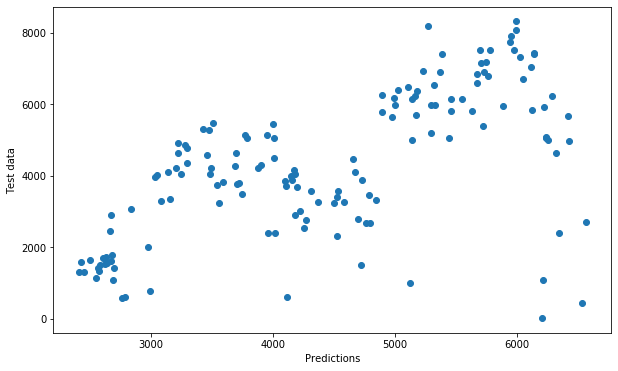

In [14]:
plt.figure(figsize = (10, 6))

plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Test data')

plt.show()

How many days of data do you have in the transformed data set (before the train test split)? 

In [15]:
trips.shape

(731, 2)

How many days of data do you have in the test set? 

In [16]:
X_test.shape

(147, 1)

What do you think of the model so far? You are probably a bit disappointed, both with how the graph looks as well as with the mean absolute error. Missing your daily predictions by over 1200 is not great.

In [17]:
np.mean(trips.trip_count)

4453.731874145007

Taking the average daily number of trips into consideration, our predictions are off by around 28% every day.

Also, the R2 score, which is about 0.373 is far from the optimal 1.0. But what is the interpretation of R2? It tells us how much of the variation of the data is explained by the model. Reviewing the graph from above, there is a lot of variation and our model is only accounting for 37,3% of it.

Let’s see if we can refine our model to do a bit better.

# 4.3. Refining the Model

Don’t get discouraged that the first try wasn’t that great. You might have even guessed that that would be the case. Let’s look at the time series of daily rentals.

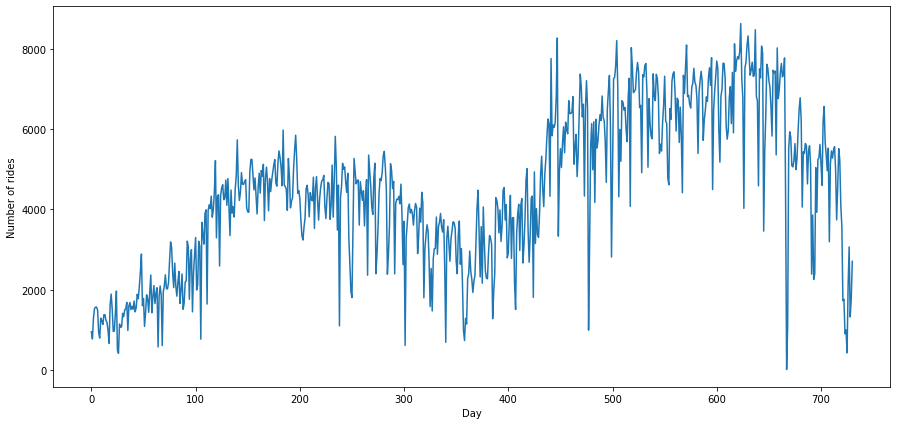

In [18]:
plt.figure(figsize = (15, 7))
plt.plot(trips.start_date, trips.trip_count)
plt.xlabel('Day')
plt.ylabel('Number of rides')
plt.show()

The representation of the date we chose is definitely simple, but you know from the time series visualization, that numbering the days that way would leave out a lot of valuable information. You can see in the graph above that there are seasonal variations in the data as well as variations due to the day of the week. We also know that as we went from year to year, overall rentals kept growing. So, instead of encoding our date as a single number, let’s encode the date by adding features for the year, month, day and even weekday. Hopefully by adding more features that capture the various kinds of variation, our model will get better.

This kind of development of the model is very common. Start with a simple idea and then refine it, learning what you can from the previous refinements. Sometimes an idea you think will make an improvement actually turns out to hurt more than it helps, so you have to abandon it. This is part of the joy and the frustration of data science: it is an experimental science. There is not necessarily one “right way” to get the best answer. In this particular example we might have to admit that we can only do so much. The shape of the time series is clearly NOT a linear function, but we will do the best with the tools we have. The truth is that there are other approaches besides linear regression that will ultimately work better for data like this, but we can still learn a lot by trying to see how far we can push linear regression.

# 4.4. Version 2.0 Task List

* Create four new features out of the date: a column for year, month, day, and weekday.

* Redo the train-test split using the same random_state as before.

* Fit a new model using the new features.

* Make a new set of predictions for the test days.

* Calculate the mean squared error, mean absolute error, and R2 for this new model against the known values.

* Plot the predictions against the known values to see how they look with more features.

In [19]:
trips = pd.read_csv(r'C:\Users\kkoum\Documents\1. University\Business study\Dataset\trip_data_2011_2012.csv', parse_dates=['start_date','end_date'])
trips.head()

,start_date,end_date,duration,start_station_id,start_station,end_station_id,end_station,bike_number,member_type
0,2011-01-01 00:01:29,2011-01-01 01:00:37,3548,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,2011-01-01 00:02:46,2011-01-01 00:08:32,346,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,2011-01-01 00:06:13,2011-01-01 00:15:36,562,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,2011-01-01 00:09:21,2011-01-01 00:16:36,434,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,2011-01-01 00:28:26,2011-01-01 00:32:19,233,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


In [20]:
trips['year'] = trips['start_date'].dt.strftime('%Y')
trips['month'] = trips['start_date'].dt.strftime('%m')
trips['day'] = trips['start_date'].dt.strftime('%d')
trips['weekday'] = trips['start_date'].dt.strftime('%w')
trips['duration'] = trips['duration']
trips.head()

,start_date,end_date,duration,start_station_id,start_station,end_station_id,end_station,bike_number,member_type,year,month,day,weekday
0,2011-01-01 00:01:29,2011-01-01 01:00:37,3548,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,2011,01,01,6
1,2011-01-01 00:02:46,2011-01-01 00:08:32,346,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,2011,01,01,6
2,2011-01-01 00:06:13,2011-01-01 00:15:36,562,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,2011,01,01,6
3,2011-01-01 00:09:21,2011-01-01 00:16:36,434,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,2011,01,01,6
4,2011-01-01 00:28:26,2011-01-01 00:32:19,233,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,2011,01,01,6


In [21]:
trips = trips.groupby(['year', 'month', 'day', 'weekday'])['duration'].count()
trips.head()

year  month  day  weekday
2011  01     01   6           959
             02   0           781
             03   1          1301
             04   2          1536
             05   3          1571
Name: duration, dtype: int64

In [22]:
trips = trips.reset_index()
trips = trips.rename(columns = {'duration' : 'trip_count'})
trips['day_number'] = trips.index
trips.head()

,year,month,day,weekday,trip_count,day_number
0,2011,01,01,6,959,0
1,2011,01,02,0,781,1
2,2011,01,03,1,1301,2
3,2011,01,04,2,1536,3
4,2011,01,05,3,1571,4


In [23]:
X_train, X_test, y_train, y_test = train_test_split(trips.drop('trip_count', axis = 1), trips['trip_count'], test_size=0.20, random_state=997)
print(X_train)
print(y_train)

     year month day weekday  day_number
703  2012    12  04       2         703
475  2012    04  20       5         475
164  2011    06  14       2         164
261  2011    09  19       1         261
548  2012    07  02       1         548
..    ...   ...  ..     ...         ...
205  2011    07  25       1         205
485  2012    04  30       1         485
638  2012    09  30       0         638
454  2012    03  30       5         454
628  2012    09  20       4         628

[584 rows x 5 columns]
703    6562
475    7203
164    4829
261    4467
548    6158
       ... 
205    3790
485    5528
638    6812
454    5411
628    7659
Name: trip_count, Length: 584, dtype: int64


In [24]:
reg = linear_model.LinearRegression()

In [25]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = reg.predict(X_test)

In [27]:
mean_squared_error(y_test, y_pred)

2160447.947832117

In [28]:
mean_absolute_error(y_test, y_pred)

1047.0783328491004

In [29]:
r2_score(y_test, y_pred)

0.46840512131579015

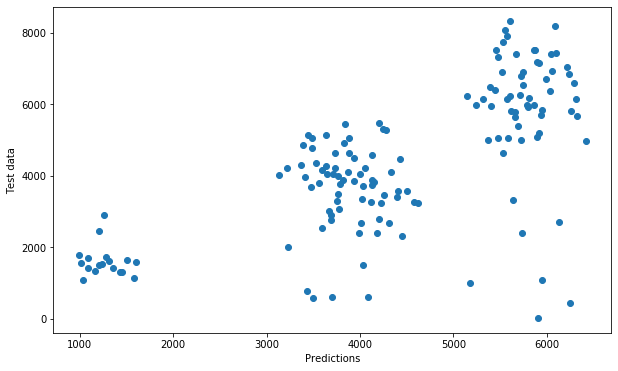

In [30]:
plt.figure(figsize = (10, 6))

plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Test data')

plt.show()

Let’s make one more refinement to our version 2.0 model. The problem with using month number in the hopes that we will capture seasonality is that numbering the months from 1 to 12 implies something linear about the months. So, although there is a linear relationship in that June comes after May on the calendar, for a problem where we care about seasonality, that doesn’t work. The winter months include 11, 12, 1, and 2. (Probably even 3 if you live in the Midwest.)

Let’s do a bit more feature engineering to see if we can make an improvement. Your first thought is probably to add a new column called season, however numbering the seasons winter=0, spring=1, summer=2, fall=3 is not really a solution, because, as with months, there is not an ordered relationship between the seasons. Spring is not more than winter or better than winter, so assigning 0 to winter and 1 to spring is actually misleading. There are many examples of this, such as encoding gender, location information, or marital status. The general rule is that if the data is not ordinal, don’t encode it as ordinal! But how do we encode nominal data to make use of it in our work?

The solution to this in data science is to encode this information using a technique called one-hot encoding. To use one-hot encoding, we’ll add four new columns to our model, one for each season. If the date for a particular row of the model is in one of the winter months, then the value for winter will be 1 and the value for all other season columns will be 0. Similarly, if the date for a row corresponds to a date in the summer months, then the value for the summer column will be 1 and the value for all the other season columns will be 0. This allows us to capture the seasonal information and use it in our model.

# 4.5. Version 2.5 Task List

* Update your DataFrame to do one-hot encoding for each of the seasons.

* Retrain and retest your model.

In [31]:
trips['winter'] = 0
trips['spring'] = 0
trips['summer'] = 0
trips['autumn'] = 0

for i in trips.index:
    if trips['month'][i] == '12' or trips['month'][i] == '01' or trips['month'][i] == '02':
        trips['winter'][i] = 1
        
    if trips['month'][i] == '03' or trips['month'][i] == '04' or trips['month'][i] == '05':
        trips['spring'][i] = 1
    
    if trips['month'][i] == '06' or trips['month'][i] == '07' or trips['month'][i] == '08':
        trips['summer'][i] = 1
    
    if trips['month'][i] == '09' or trips['month'][i] == '10' or trips['month'][i] == '11':
        trips['autumn'][i] = 1
trips.head()

C:\Users\kkoum\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kkoum\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\kkoum\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kkoum\Anaconda3\lib\site-packag

,year,month,day,weekday,trip_count,day_number,winter,spring,summer,autumn
0,2011,01,01,6,959,0,1,0,0,0
1,2011,01,02,0,781,1,1,0,0,0
2,2011,01,03,1,1301,2,1,0,0,0
3,2011,01,04,2,1536,3,1,0,0,0
4,2011,01,05,3,1571,4,1,0,0,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(trips.drop('trip_count', axis = 1), trips['trip_count'], test_size=0.20, random_state=997)
print(X_train)
print(y_train)

     year month day weekday  day_number  winter  spring  summer  autumn
703  2012    12  04       2         703       1       0       0       0
475  2012    04  20       5         475       0       1       0       0
164  2011    06  14       2         164       0       0       1       0
261  2011    09  19       1         261       0       0       0       1
548  2012    07  02       1         548       0       0       1       0
..    ...   ...  ..     ...         ...     ...     ...     ...     ...
205  2011    07  25       1         205       0       0       1       0
485  2012    04  30       1         485       0       1       0       0
638  2012    09  30       0         638       0       0       0       1
454  2012    03  30       5         454       0       1       0       0
628  2012    09  20       4         628       0       0       0       1

[584 rows x 9 columns]
703    6562
475    7203
164    4829
261    4467
548    6158
       ... 
205    3790
485    5528
638    6812
454 

In [33]:
reg = linear_model.LinearRegression()

In [34]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_pred = reg.predict(X_test)

In [36]:
mean_squared_error(y_test, y_pred)

1738674.5084684596

In [37]:
mean_absolute_error(y_test, y_pred)

904.800989434934

In [38]:
r2_score(y_test, y_pred)

0.5721857287383061

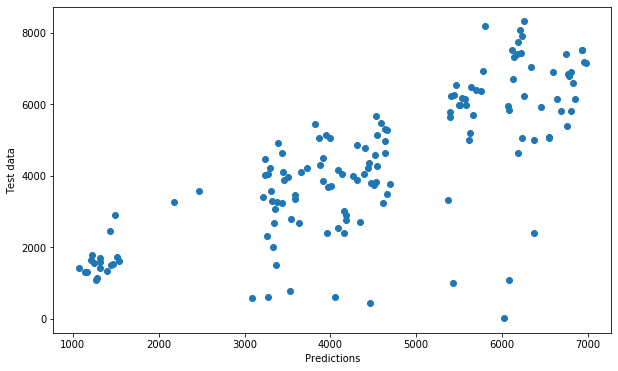

In [39]:
plt.figure(figsize = (10, 6))

plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Test data')

plt.show()

Cool! That gave us some real improvement.

# 4.6. Version 3.0

Now that you have been through the cycle a couple of times, you are probably saying to yourself: “Hey, there are other factors to bike rental besides just the day of the week or the season!” And you are correct, the weather on a particular day may be more important than what day of the week it is! Who wants to rent a bike and ride through Washington DC in the rain or snow?

So, let’s add some weather information. This could be a good chance to practice your WebAPI skills again, or even do some screen scraping from a source that allows it. But we also have some weather data for you. The data can be found in the weather table and its columns look like this:

* weather_situation: Weather situation, integer column with the following meaning

    1. Clear, Few clouds, Partly cloudy, Partly cloudy

    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* temperature: Temperature in degrees C

* temperature_feel: The feeling temperature C

* humidity: Humidity percent from 0 to 100

* windspeed: Wind speed in mph

Now you may have a look at a few rows and incorporate this weather data into your model.

In [40]:
weather = pd.read_csv(r'C:\Users\kkoum\Documents\1. University\Business study\Dataset\weather_holidays_2011_2012.csv')
weather.head()

,date,holiday,weather_situation,temperature,temperature_feel,humidity,windspeed
0,01/01/11,0,2,8,8,81,11
1,02/01/11,0,2,9,7,70,17
2,03/01/11,0,1,1,-3,44,17
3,04/01/11,0,1,1,-2,59,11
4,05/01/11,0,1,3,-1,44,13


In [41]:
trips['weather_situation'] = weather['weather_situation']
trips['temperature'] = weather['temperature']
trips['temperature_feel'] = weather['temperature_feel']
trips['humidity'] = weather['humidity']
trips['windspeed'] = weather['windspeed']
trips.head()

,year,month,day,weekday,trip_count,day_number,winter,spring,summer,autumn,weather_situation,temperature,temperature_feel,humidity,windspeed
0,2011,01,01,6,959,0,1,0,0,0,2,8,8,81,11
1,2011,01,02,0,781,1,1,0,0,0,2,9,7,70,17
2,2011,01,03,1,1301,2,1,0,0,0,1,1,-3,44,17
3,2011,01,04,2,1536,3,1,0,0,0,1,1,-2,59,11
4,2011,01,05,3,1571,4,1,0,0,0,1,3,-1,44,13


In [42]:
X_train, X_test, y_train, y_test = train_test_split(trips.drop('trip_count', axis = 1), trips['trip_count'], test_size=0.20, random_state=997)
print(X_train)
print(y_train)

     year month day weekday  day_number  winter  spring  summer  autumn  \
703  2012    12  04       2         703       1       0       0       0   
475  2012    04  20       5         475       0       1       0       0   
164  2011    06  14       2         164       0       0       1       0   
261  2011    09  19       1         261       0       0       0       1   
548  2012    07  02       1         548       0       0       1       0   
..    ...   ...  ..     ...         ...     ...     ...     ...     ...   
205  2011    07  25       1         205       0       0       1       0   
485  2012    04  30       1         485       0       1       0       0   
638  2012    09  30       0         638       0       0       0       1   
454  2012    03  30       5         454       0       1       0       0   
628  2012    09  20       4         628       0       0       0       1   

     weather_situation  temperature  temperature_feel  humidity  windspeed  
703                  1

In [43]:
reg = linear_model.LinearRegression()

In [44]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred = reg.predict(X_test)

In [46]:
mean_squared_error(y_test, y_pred)

847389.2204943015

In [47]:
mean_absolute_error(y_test, y_pred)

647.1903749217793

In [48]:
r2_score(y_test, y_pred)

0.7914933473315136

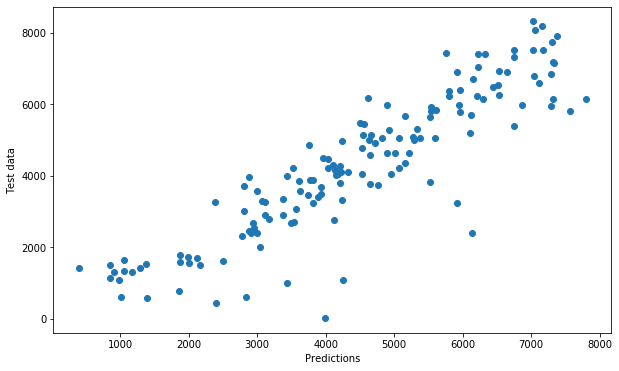

In [49]:
plt.figure(figsize = (10, 6))

plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Test data')

plt.show()

# 4.7. Feature Engineering - Re-Scaling

One last bit of feature engineering you can try is to re-scale the values of your features so they are all on a common scale. One of the problems with leaving all the features in their “normal” units is that it warps the n-dimensional space in strange ways. Some axes are elongated with respect to other axes. For example, think about the values for our one-hot encoded features like the season or weekend. Those values are either 0 or 1. However, the temperature values can range from -5 to a max of 32. Just think of how the 2-dimensional graph looks if you just use those two features.

Now, why is this a problem? Remember that we are trying to minimize the sum of squared errors as we try to find the coefficients for each of our features. What that means is that we are calculating the distance between a known point in some n-dimensional space, and a predicted point in the same n-dimensional space. But if some axes are really elongated and others are really short, that introduces a bias that the algorithm has to overcome. Whereas if you re-scale the temperature to be on a scale from 0 to 1, then you have a nice space where all the features are on the same scales and the algorithm can do its job more efficiently.

One really common method for transforming the data is to use min-max scaling.

scaled = (vi−min(v)) / (max(v)−min(v))

This will ensure that all of your values are between 0 and 1.

In [50]:
trips = trips.astype(float)

trips['year'] = (trips['year'] - trips['year'].min()) / (trips['year'].max() - trips['year'].min())
trips['month'] = (trips['month'] - trips['month'].min()) / (trips['month'].max() - trips['month'].min())
trips['day'] = (trips['day'] - trips['day'].min()) / (trips['day'].max() - trips['day'].min())
trips['weekday'] = (trips['weekday'] - trips['weekday'].min()) / (trips['weekday'].max() - trips['weekday'].min())
trips['day_number'] = (trips['day_number'] - trips['day_number'].min()) / (trips['day_number'].max() - trips['day_number'].min())
trips['weather_situation'] = (trips['weather_situation'] - trips['weather_situation'].min()) / (trips['weather_situation'].max() - trips['weather_situation'].min())
trips['temperature'] = (trips['temperature'] - trips['temperature'].min()) / (trips['temperature'].max() - trips['temperature'].min())
trips['temperature_feel'] = (trips['temperature_feel'] - trips['temperature_feel'].min()) / (trips['temperature_feel'].max() - trips['temperature_feel'].min())
trips['humidity'] = (trips['humidity'] - trips['humidity'].min()) / (trips['humidity'].max() - trips['humidity'].min())
trips['windspeed'] = (trips['windspeed'] - trips['windspeed'].min()) / (trips['windspeed'].max() - trips['windspeed'].min())

trips.head()

,year,month,day,weekday,trip_count,day_number,winter,spring,summer,autumn,weather_situation,temperature,temperature_feel,humidity,windspeed
0,0.0,0.0,0.000000,1.000000,959.0,0.000000,1.0,0.0,0.0,0.0,0.5,0.351351,0.38,0.835052,0.28125
1,0.0,0.0,0.033333,0.000000,781.0,0.001370,1.0,0.0,0.0,0.0,0.5,0.378378,0.36,0.721649,0.46875
2,0.0,0.0,0.066667,0.166667,1301.0,0.002740,1.0,0.0,0.0,0.0,0.0,0.162162,0.16,0.453608,0.46875
3,0.0,0.0,0.100000,0.333333,1536.0,0.004110,1.0,0.0,0.0,0.0,0.0,0.162162,0.18,0.608247,0.28125
4,0.0,0.0,0.133333,0.500000,1571.0,0.005479,1.0,0.0,0.0,0.0,0.0,0.216216,0.20,0.453608,0.34375


In [51]:
X_train, X_test, y_train, y_test = train_test_split(trips.drop('trip_count', axis = 1), trips['trip_count'], test_size=0.20, random_state=997)
print(X_train)
print(y_train)

     year     month       day   weekday  day_number  winter  spring  summer  \
703   1.0  1.000000  0.100000  0.333333    0.963014     1.0     0.0     0.0   
475   1.0  0.272727  0.633333  0.833333    0.650685     0.0     1.0     0.0   
164   0.0  0.454545  0.433333  0.333333    0.224658     0.0     0.0     1.0   
261   0.0  0.727273  0.600000  0.166667    0.357534     0.0     0.0     0.0   
548   1.0  0.545455  0.033333  0.166667    0.750685     0.0     0.0     1.0   
..    ...       ...       ...       ...         ...     ...     ...     ...   
205   0.0  0.545455  0.800000  0.166667    0.280822     0.0     0.0     1.0   
485   1.0  0.272727  0.966667  0.166667    0.664384     0.0     1.0     0.0   
638   1.0  0.727273  0.966667  0.000000    0.873973     0.0     0.0     0.0   
454   1.0  0.181818  0.966667  0.833333    0.621918     0.0     1.0     0.0   
628   1.0  0.727273  0.633333  0.666667    0.860274     0.0     0.0     0.0   

     autumn  weather_situation  temperature  temper

In [52]:
reg = linear_model.LinearRegression()

In [53]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_pred = reg.predict(X_test)

In [55]:
mean_squared_error(y_test, y_pred)

847389.2204947461

In [56]:
mean_absolute_error(y_test, y_pred)

647.1903749243028

In [57]:
r2_score(y_test, y_pred)

0.7914933473314042

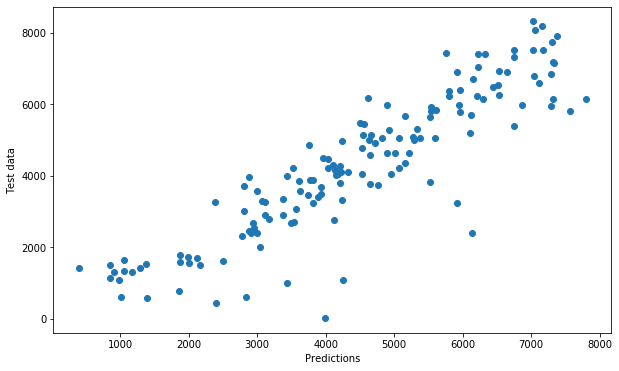

In [58]:
plt.figure(figsize = (10, 6))

plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Test data')

plt.show()